### Alex Kramer - Northeastern - Summer 2023 - Homework 2 - DS 5110

In this assignment you are a Data Scientist investigating crime trends over the past 4-5 years. You are particularly interested in exploring whether the Covid-19 pandemic impacted patterns of crime in the City of Boston.
1. Use Panda’s DataFrames to analyze and visualize crime data from 2018, 2020, and 2022.
2. You are free to use any advanced visualization tools you like. You may find the Seaborn library particularly handy, but it is not a requirement. (seaborn.pydata.org).  It is required that your visuals be captioned and publication ready. At least one of your visualizations should include a geospatial map of crime like how you mapped out the trees of Boston in Homework 1. You should apply some method of interpolation or convolution to spatially smooth your data over the area of Boston and use array-based operations to measure and visualizes changes over time.
3. Summarize your analysis with a 2-page written research report that includes an Introduction, Methods, Analysis, Conclusions, and References.
Extra credit – both sections (10 points): I have also provided you with locations of approved and proposed Cannabis dispensaries. Some research has suggested that the presence of Cannabis dispensaries may not significantly contribute to an increase in crime rates. Investigate and draw your own conclusions with a captioned visualization for full credit.

In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import geopandas as gpd
import seaborn as sns
import geoplot # geoplot requires a specific version

In [54]:
def data(file):
    # Function takes a file, reads in the files and cleans it accordingly
    
    # read the data in 
    data = pd.read_csv(file, low_memory=False)
    # drop not needed columns
    data = data.drop(columns=['OFFENSE_CODE_GROUP','INCIDENT_NUMBER', 'OFFENSE_DESCRIPTION','REPORTING_AREA', 'OCCURRED_ON_DATE', 'UCR_PART','STREET', 'SHOOTING', 'Location'])
    # drop any data with NaN
    data = data.dropna()
    
    # make sure our data is within city limits
    data = data[data.Lat >= 42.20]
    data = data[data.Lat <= 42.40]
    
    data = data[data.Long >= -71.2]
    data = data[data.Long <= -70.95]

    
    # convert lat, long to a point
    df_geo = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Long, data.Lat))
    
    # make new columns 
    df_geo['YCoord'] = data['Lat']
    df_geo['XCoord'] = data['Long']
    
    # return data
    return df_geo


In [55]:
def plot_crimes(df_bos, color):
    # create function to plot points 
    
    # read in boston boundaries, city outline
    df_bos_map = gpd.read_file('Boston Boundary/City_of_Boston_Boundary.shp')

    # set coordinates system correctly, so our axis can work 
    df_bos.set_crs(crs='EPSG:4326')

    # set boston map to correct coordinates system
    df_bos_map = df_bos_map.to_crs(epsg=4326)

    street_ax = df_bos_map.plot(color='gray')

    df_bos.plot(ax=street_ax, color=color, markersize=3)
    
    plt.xlabel('Longitude')
    plt.ylabel("Latitude")

## Create Scatter Plot: Criminal Incidents over Boston in 2018, 2020, 2022

   OFFENSE_CODE DISTRICT  YEAR  MONTH DAY_OF_WEEK  HOUR        Lat       Long  \
0          2629       B2  2018      1      Monday     0  42.331538 -71.080157   
1          1107      D14  2018      1      Monday     0  42.349780 -71.134230   
2          2610      C11  2018      1      Monday     0  42.291093 -71.065945   
3          3208       D4  2018      1      Monday     0  42.353522 -71.072838   
4           619      C11  2018      1      Monday     0  42.296323 -71.063569   

                     geometry     YCoord     XCoord  
0  POINT (-71.08016 42.33154)  42.331538 -71.080157  
1  POINT (-71.13423 42.34978)  42.349780 -71.134230  
2  POINT (-71.06595 42.29109)  42.291093 -71.065945  
3  POINT (-71.07284 42.35352)  42.353522 -71.072838  
4  POINT (-71.06357 42.29632)  42.296323 -71.063569  


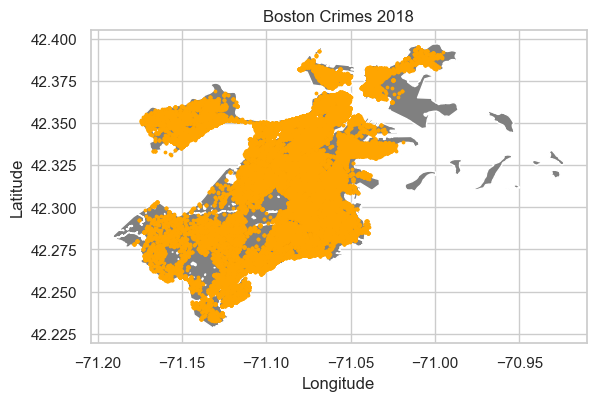

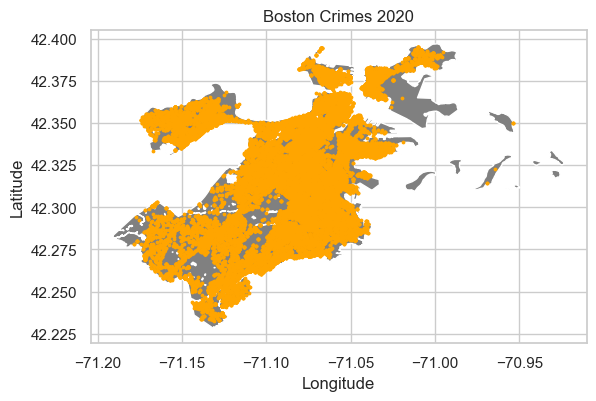

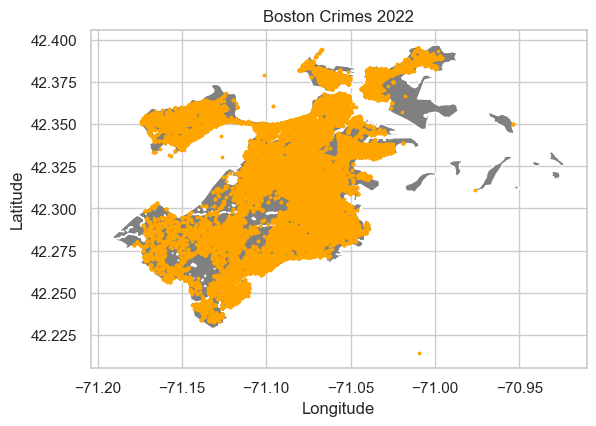

In [98]:
# reads & cleans data
df_bos18 = data('boston_crime_2018.csv')
df_bos20 = data('boston_crime_2020.csv')
df_bos22 = data('boston_crime_2022.csv')

# Make scatter plots of crime in boston
plot_crimes(df_bos18, 'orange')
plt.title('Boston Crimes 2018')

plot_crimes(df_bos20, 'orange')
plt.title("Boston Crimes 2020")
    
plot_crimes(df_bos22, 'orange')
plt.title("Boston Crimes 2022")


In [101]:
def time_series_data(file):
    # function creates our time series graphs 
    
    # read the data in
    data = pd.read_csv(file, low_memory=False)
    # drop not needed columns
    data = data.drop(columns=['OFFENSE_CODE_GROUP','INCIDENT_NUMBER', 
                              'OFFENSE_DESCRIPTION','REPORTING_AREA',  
                              'UCR_PART','STREET', 'SHOOTING', 'Location'])
    # drop any data with NaN
    data = data.dropna()
    
    # checks city boundaries
    data = data[data.Lat >= 42.20]
    data = data[data.Lat <= 42.40]

    data = data[data.Long >= -71.2]
    data = data[data.Long <= -70.95]


    # convert lat, long to a point
    df_geo = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Long, data.Lat))

    df_geo['YCoord'] = data['Lat']
    df_geo['XCoord'] = data['Long']
    
    # converts to a pd datetime 
    df_geo['OCCURRED_ON_DATE'] = pd.to_datetime(df_geo['OCCURRED_ON_DATE'])
    df_geo['date_only'] = df_geo['OCCURRED_ON_DATE'].dt.date
    
    # calculates count
    counts = df_geo.groupby('date_only').size()
    counts = counts.reset_index()
    counts.columns = ['date', 'count']
    
    # calculates count average
    average_count = counts['count'].mean()
    
    ## plots 
    sns.set_style('whitegrid')
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='date', y='count', data=counts)
    plt.axhline(y=average_count, color='red', linestyle='--', label='Average')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Number of Incidents')
    plt.text(counts['date'].iloc[-1], average_count, f'Average: {average_count:.2f}', color='red', ha='left', va='bottom')

## Create Time Series: Criminal Incidents Over Time 2018, 2020, 2022

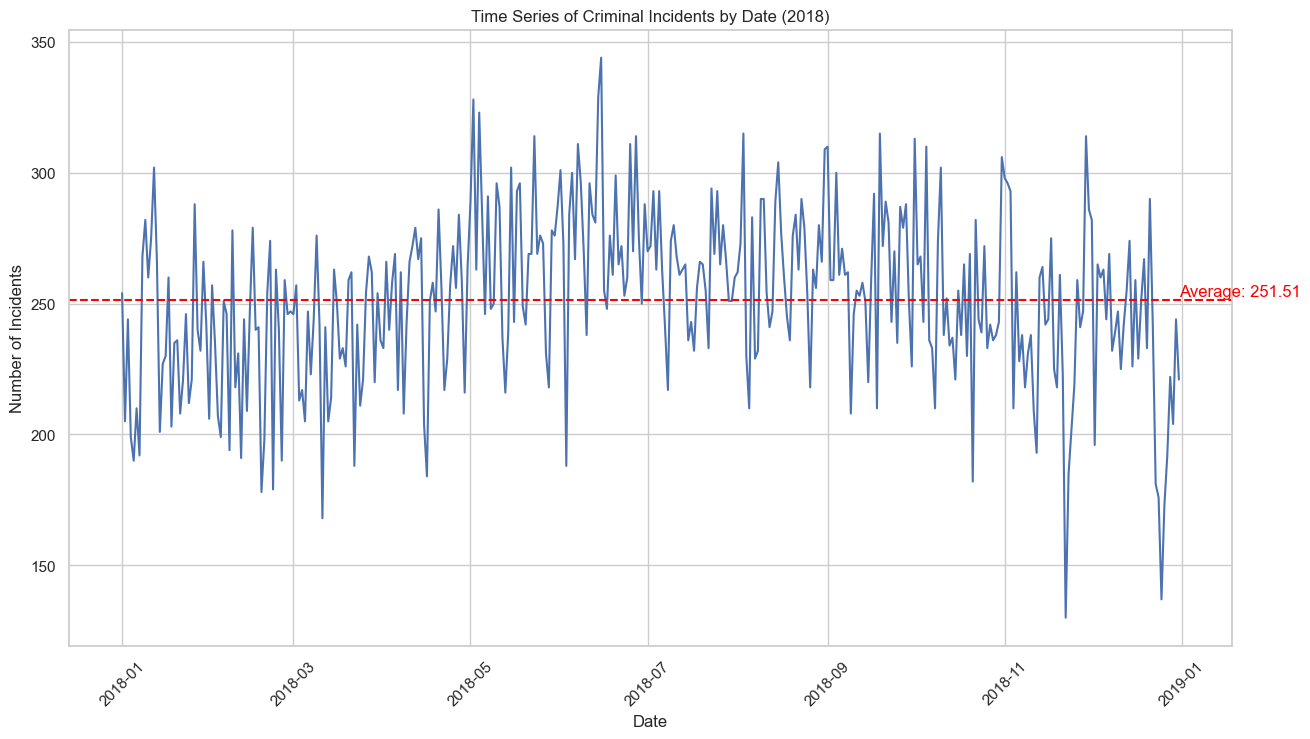

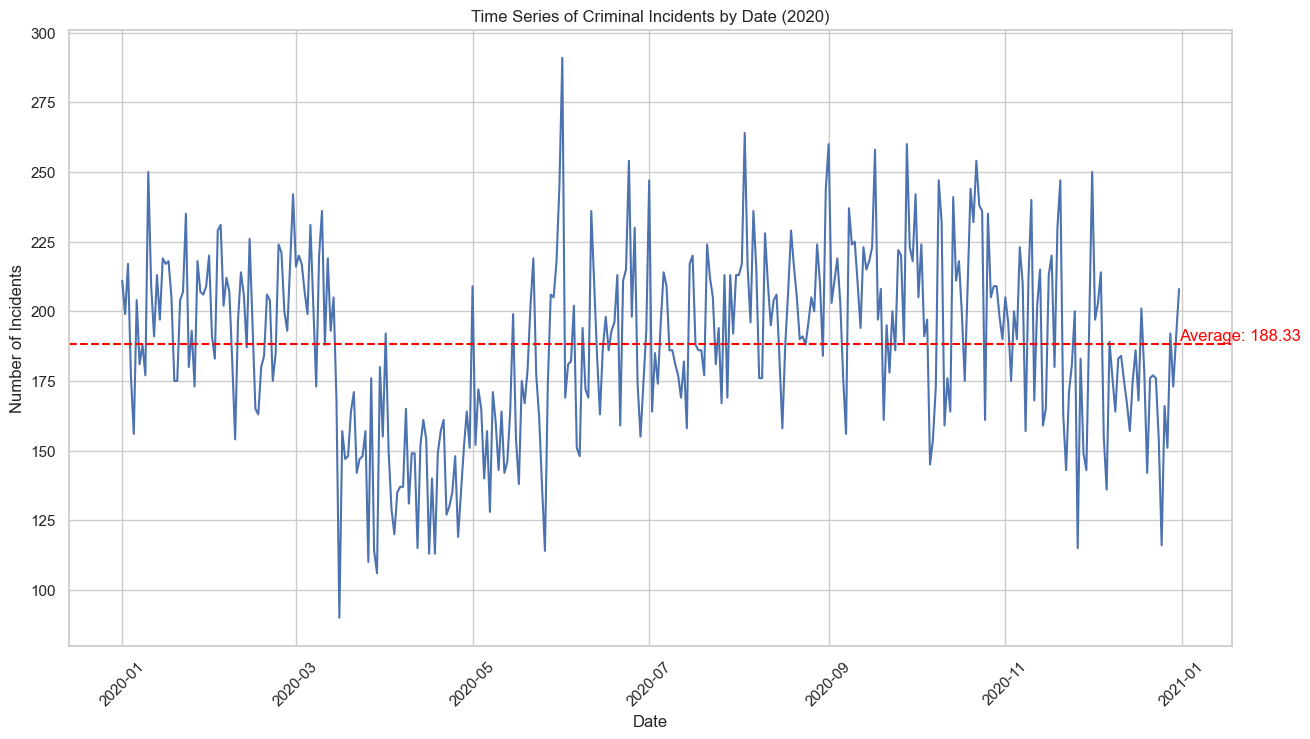

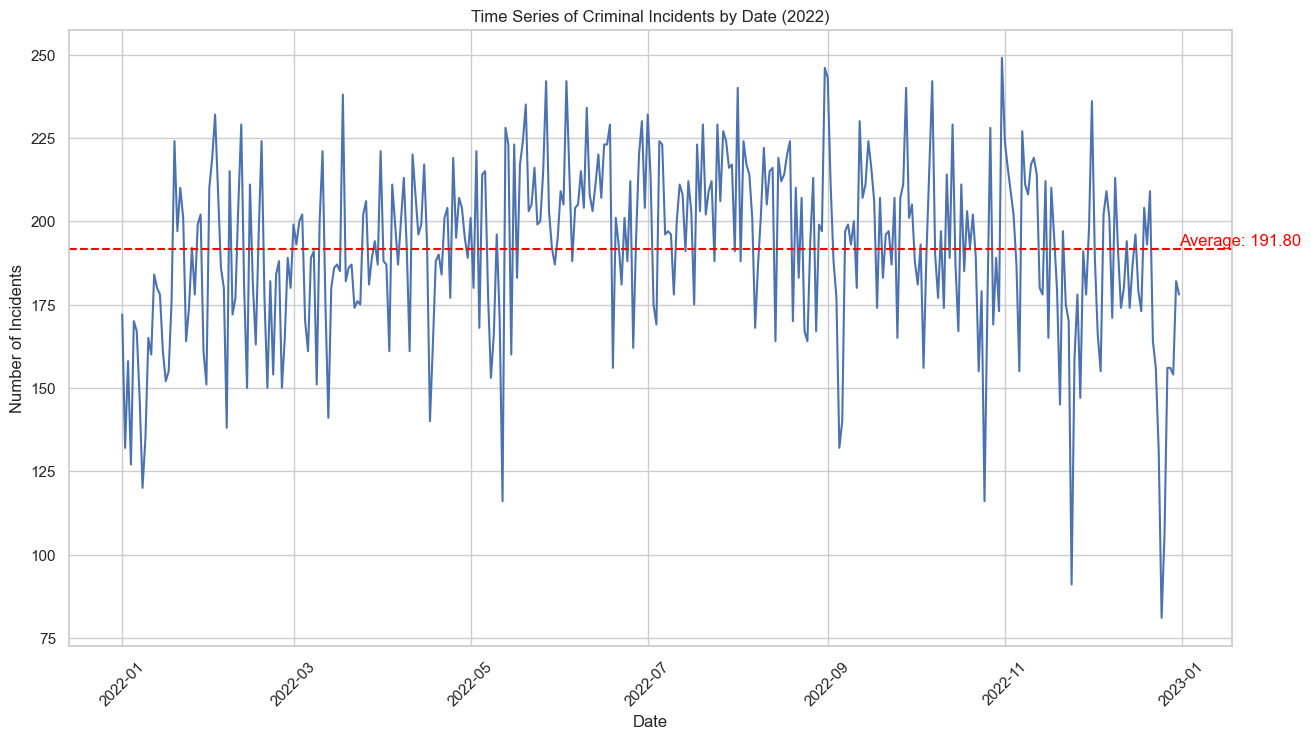

In [102]:
df_bos18 = time_series_data('boston_crime_2018.csv')
plt.title('Time Series of Criminal Incidents by Date (2018)')
plt.show()
df_bos20 = time_series_data('boston_crime_2020.csv')
plt.title('Time Series of Criminal Incidents by Date (2020)')
plt.show()
df_bos22 = time_series_data('boston_crime_2022.csv')
plt.title('Time Series of Criminal Incidents by Date (2022)')

plt.show()

In [87]:
def return_boston(file):
    # takes file and cleans / preps it in a different way 
    
    data = pd.read_csv(file, low_memory=False)
    # drop not needed columns
    data = data.drop(columns=['OFFENSE_CODE_GROUP','INCIDENT_NUMBER', 
                              'OFFENSE_DESCRIPTION','REPORTING_AREA',  
                              'UCR_PART','STREET', 'SHOOTING', 'Location'])
    # drop any data with NaN
    data = data.dropna()
    
    # checks boundaries
    data = data[data.Lat >= 42.20]
    data = data[data.Lat <= 42.40]

    data = data[data.Long >= -71.2]
    data = data[data.Long <= -70.95]

    # convert lat, long to a point
    df_geo = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Long, data.Lat))

    df_geo['YCoord'] = data['Lat']
    df_geo['XCoord'] = data['Long']
    
    # return data frame
    return df_geo

## Creates Seaborn FacetGrid - Advance Time Series

/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


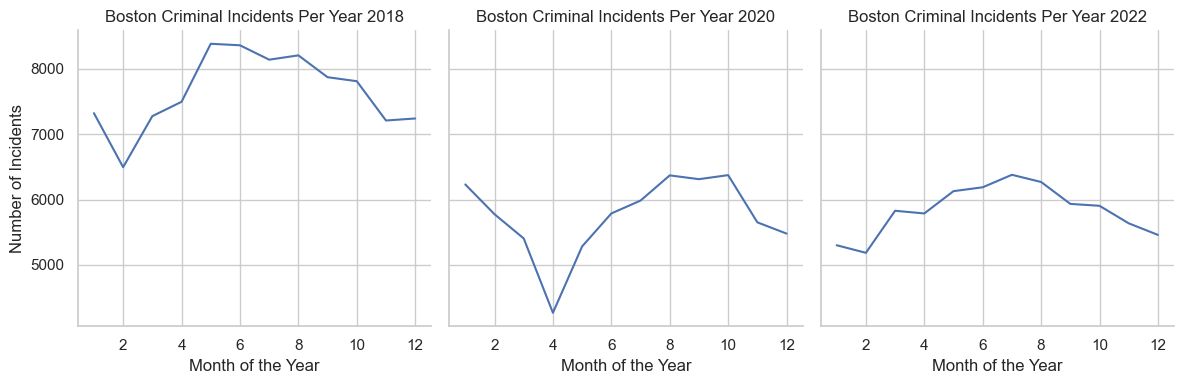

In [95]:
# reads in / cleans data
df_2018 = return_boston('boston_crime_2018.csv')
df_2020 = return_boston('boston_crime_2020.csv')
df_2022 = return_boston('boston_crime_2022.csv')

# changes dataframes date columns to a pd datetime
df_2018['OCCURRED_ON_DATE'] = pd.to_datetime(df_2018['OCCURRED_ON_DATE'])
df_2018['year'] = df_2018['OCCURRED_ON_DATE'].dt.year
df_2018['month'] = df_2018['OCCURRED_ON_DATE'].dt.month
# changes dataframes date columns to a pd datetime
df_2020['OCCURRED_ON_DATE'] = pd.to_datetime(df_2020['OCCURRED_ON_DATE'])
df_2020['year'] = df_2020['OCCURRED_ON_DATE'].dt.year
df_2020['month'] = df_2020['OCCURRED_ON_DATE'].dt.month
# changes dataframes date columns to a pd datetime
df_2022['OCCURRED_ON_DATE'] = pd.to_datetime(df_2022['OCCURRED_ON_DATE'])
df_2022['year'] = df_2022['OCCURRED_ON_DATE'].dt.year
df_2022['month'] = df_2022['OCCURRED_ON_DATE'].dt.month

# appends all dataframes together
combined_df = pd.concat([df_2018, df_2020, df_2022], ignore_index=True)

# calculates count
counts = combined_df.groupby(['year', 'month']).size().reset_index(name='count')

# creates FacetGrid for each year
g = sns.FacetGrid(counts, col='year', col_wrap=3, height=4)

# plot & lables
g.map(sns.lineplot, 'month', 'count', ci=None)
g.set_axis_labels('Month of the Year', 'Number of Incidents')
g.set_titles('Boston Criminal Incidents Per Year {col_name}')

plt.tight_layout()
plt.show()


## Create Heat Map of Criminal Incidents 2018, 2020, 2022

/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


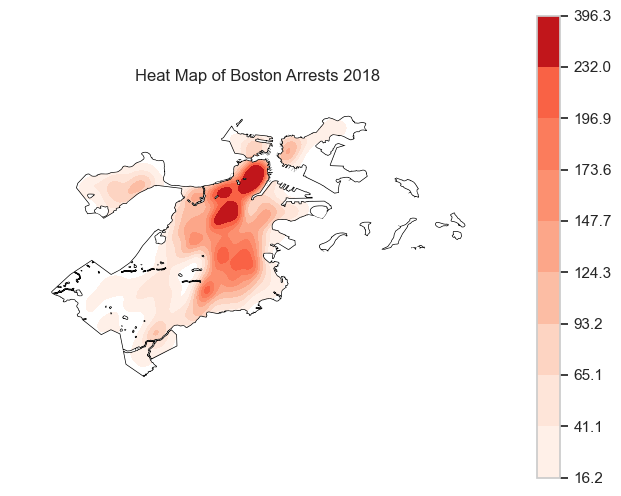

/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


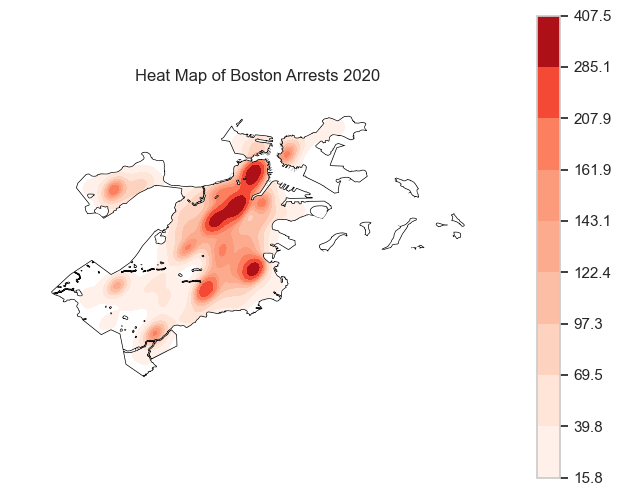

/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/alexkramer/anaconda3/envs/ds_summer/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


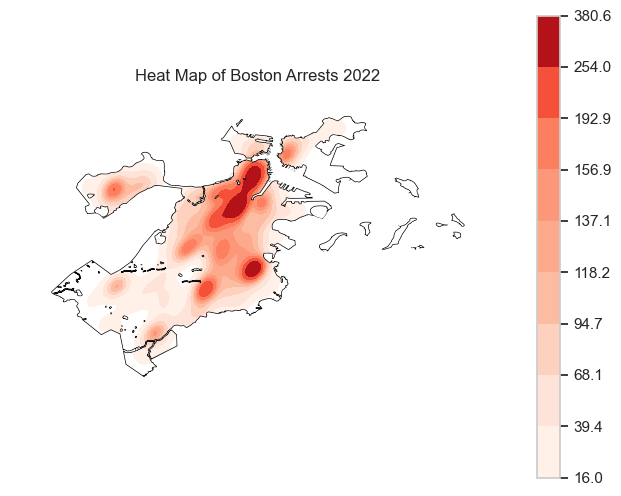

In [99]:
# creates city background
df_bos_map = gpd.read_file('Boston Boundary/City_of_Boston_Boundary.shp')
df_bos_map = df_bos_map.to_crs(epsg=4326)

# plots 2018 heat map
kde_18 = geoplot.kdeplot(df_bos18, fill=True, cmap="Reds", clip=df_bos_map, cbar=True, legend=True)
geoplot.polyplot(df_bos_map, ax=kde_18, zorder=1)

# lables
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Heat Map of Boston Arrests 2018')
plt.show()

# plots 2018 heat map
kde_20 = geoplot.kdeplot(df_bos20, fill=True, cmap="Reds", clip=df_bos_map, cbar=True, legend=True)
geoplot.polyplot(df_bos_map, ax=kde_20, zorder=1)
# lables
plt.title('Heat Map of Boston Arrests 2020')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# plots 2018 heat map
kde_22 = geoplot.kdeplot(df_bos22, fill=True, cmap="Reds", clip=df_bos_map, cbar=True, legend=True)
geoplot.polyplot(df_bos_map, ax=kde_22, zorder=1)
# lables
plt.title('Heat Map of Boston Arrests 2022')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## Dispensaries Locations over Boston

Text(0.5, 1.0, 'Dispensaires in Boston')

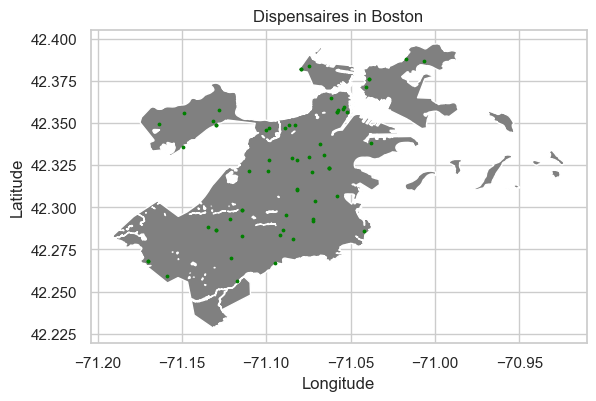

In [86]:
# read the data in 
data_dispo = pd.read_csv('boston_cannabis_registry.csv', low_memory=False)

# drop not needed columns
df_dispo = data_dispo.drop(columns=['Facility_Address', 'Main_Entity_Name', 'Seeking_Bos_Equity_Program', 'Submitted_Date',
                          'Trade_Name_DBA', 'Type_of_Marijuana_License','SAM_ID', 'updated_timestamp', 'ObjectId'])

# convert lat, long to a point
df_dispo = gpd.GeoDataFrame(df_dispo, geometry=gpd.points_from_xy(df_dispo.x, df_dispo.y))

df_dispo['YCoord'] = data_dispo['y']
df_dispo['XCoord'] = data_dispo['x']

df_dispo.head()

plot_crimes(df_dispo, 'green')
plt.title('Dispensaires in Boston')